In [7]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import f1_score, confusion_matrix, precision_recall_fscore_support
import pandas as pd

import fcnoutlier as fno
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Look at the data

# datapoints 0.00 above 68976
# datapoints 0.10 above 68976
# datapoints 0.20 above 67734
# datapoints 0.30 above 41532
# datapoints 0.40 above 17193
# datapoints 0.50 above 7264
# datapoints 0.60 above 2942
# datapoints 0.70 above 1128
# datapoints 0.80 above 354
# datapoints 0.90 above 86
# datapoints 1.00 above 0


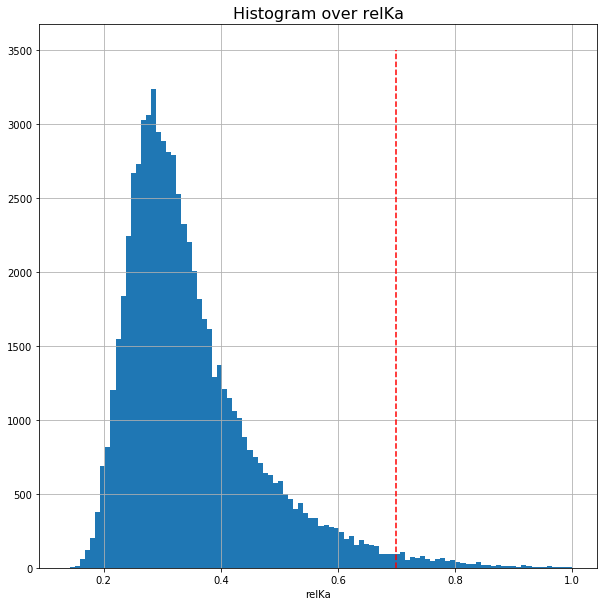

In [4]:
data = pd.read_csv('../data/groundstate/GSM1586782_ScrWT_Exd_14mer_cg_gs.txt')
fno.plot_hist(data,save=0)
fno.get_info(data)
# get in- and outlier
data = fno.get_class(data,delete=False)

# Prepare the data

In [5]:
# normalize data and calculate features
data_sc=fno.get_normal(data,feature=0)
# get train and test data
train_data, test_data, y_test, tfbs = fno.get_testdata(data_sc)
# get percentage of outlier
perc = fno.get_prec(data_sc)

/home/jate1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Calcualte Isolation forest

In [8]:
# get trained isolation forest
isof = fno.get_isfo(train_data,perc=perc)
# evaluate isolation forest
y_pred, n_errors = fno.get_eval(isof,test_data,y_test)
# look at the Class of the predicted outliers
#data.loc[test_data[y_pred == -1].index,'Class']
# calculate confusion matrix
confusion_matrix(y_test,get_labels(y_pred))
plot_cm(y_test,y_pred)

KeyboardInterrupt: 

# Calculate One Class SVM

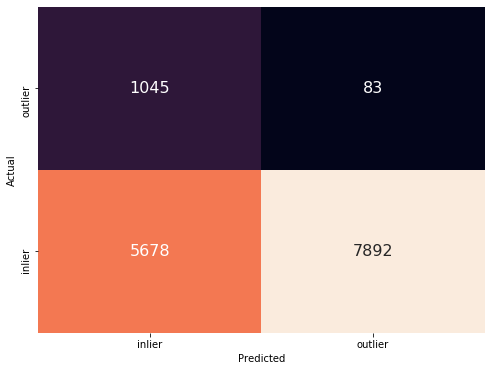

In [11]:
# get trained ocsvm
ocsvm = fno.get_ocsvm(train_data,perc=perc,gamma=0.0001,kernel='poly',deg=12)
# evaluate the model
y_pred, n_errors = fno.get_eval(ocsvm,test_data,y_test)
# look at the prediction 
#data.loc[test_data[y_pred == -1].index,'Class']
# calculate confusion matrix
#get_results(y_pred,y_test)
confusion_matrix(y_test,fno.get_labels(y_pred))
fno.plot_cm(y_test,y_pred)

#  Calculate Elliptic Envelope

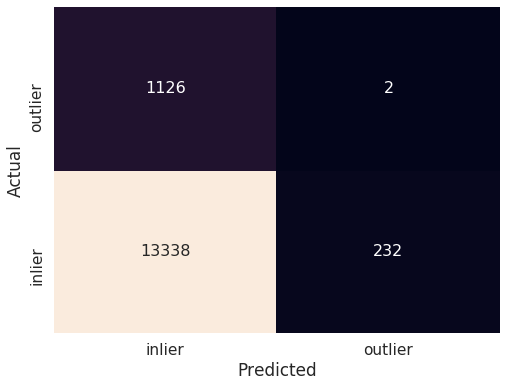

In [12]:
# get trained elliptic envelop
cov = fno.get_elliptic_env(train_data,sf=0.95,per=perc)
# get error of prediction
y_pred, n_errors = fno.get_eval(cov,test_data,y_test)
# look at predicted outliers
#data.loc[test_data[y_pred == -1].index,'Class']
# calcualte confusion matrix
confusion_matrix(y_test,fno.get_labels(y_pred))
# calculate confusion outliers and f1
#get_results(y_pred,y_test)
fno.plot_cm(y_test,y_pred)

# Local Outlier Factor

In [ ]:
tmp = data.sample(frac=0.1)
y_truth = tmp.Class
lab = tmp.Label
tmp.drop(['Class','Label'],axis=1,inplace=True)

lof = LocalOutlierFactor(n_neighbors=2,contamination=0.1)
y_pred = lof.fit_predict(tmp)
n_errors = (get_labels(y_pred) != y_truth).sum()
plot_cm(y_truth,y_pred)

# Calcualte Outlier Detection only on inter data

In [15]:
# reduce cgDNA data to only inters
kwargs = {'intra':0, 'inter':1, 'zW':0, 'zC':0}
data_part = get_part_features(data, **kwargs)
# normalize data and calculate features
data_sc=get_normal(data_part,feature=0)
true_class = data_sc['Class']
#data_sc.drop(['Class'],axis=1,inplace=True)
# get train and test data
#train_data, test_data, y_test, tfbs = get_testdata(data_sc)
train_data, test_data, y_train, y_test = train_test_split(data_sc,true_class,stratify=data['Class'])
train_data.drop(['Class'],axis=1,inplace=True)
test_data.drop(['Class'],axis=1,inplace=True)
# get percentage of outlier
perc = get_prec(data_sc)

/home/jate1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
y_train

68117    0
42484    0
18946    0
35858    0
63108    0
        ..
29751    0
44570    0
19950    0
34266    0
34229    0
Name: Class, Length: 51732, dtype: int64

# Isolation Forest

0.003629764065335753

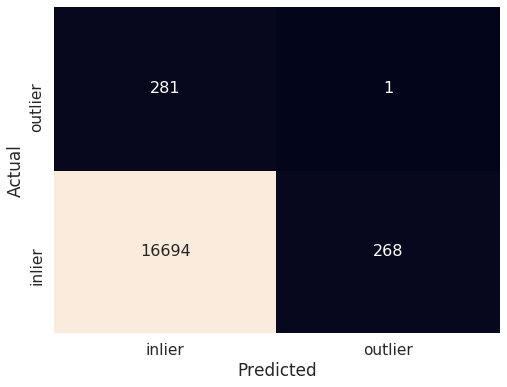

In [35]:
# get trained isolation forest
isof = get_isfo(train_data,perc=perc)
# evaluate isolation forest
y_pred, n_errors = get_eval(isof,test_data,y_test)
# look at the Class of the predicted outliers
#data.loc[test_data[y_pred == -1].index,'Class']
# calculate confusion matrix
confusion_matrix(y_test,get_labels(y_pred))
plot_cm(y_test,y_pred)
f1_score(y_test,get_labels(y_pred))

# One Class SVM

0.017285822592873392

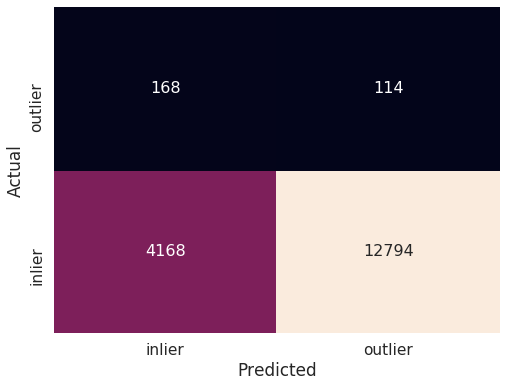

In [43]:
# get trained ocsvm
ocsvm = get_ocsvm(train_data,gamma=0.0000001,kernel='poly',deg=3)
# evaluate the model
y_pred, n_errors = get_eval(ocsvm,test_data,y_test)
# look at the prediction 
#data.loc[test_data[y_pred == -1].index,'Class']
# calculate confusion matrix
#get_results(y_pred,y_test)
confusion_matrix(y_test,get_labels(y_pred))
plot_cm(y_test,y_pred)
f1_score(y_test,get_labels(y_pred))

# Elliptic Envelop

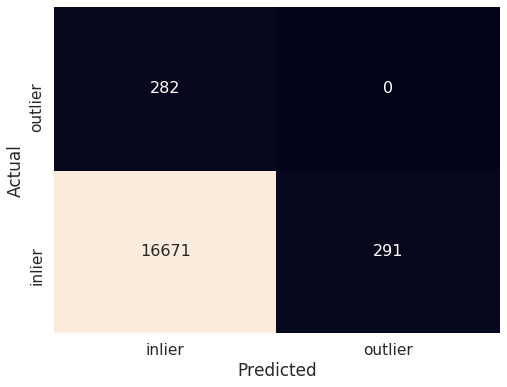

In [23]:
# get trained elliptic envelop
cov = get_elliptic_env(train_data,sf=0.5,per=perc)
# get error of prediction
y_pred, n_errors = get_eval(cov,test_data,y_test)
# look at predicted outliers
#data.loc[test_data[y_pred == -1].index,'Class']
# calcualte confusion matrix
confusion_matrix(y_test,get_labels(y_pred))
# calculate confusion outliers and f1
#get_results(y_pred,y_test)
plot_cm(y_test,y_pred)

# Local Outlier Factor

In [ ]:
# get fraction of the data as training data
tmp = data_part.sample(frac=0.1)
# save Class and label
y_truth = tmp.Class
lab = tmp.Label
# drop Class and Label
tmp.drop(['Class','Label'],axis=1,inplace=True)
# get LOF
lof = LocalOutlierFactor(n_neighbors=50,contamination=0.05)
# fit and predict methods
y_pred = lof.fit_predict(tmp)
#get error
n_errors = (get_labels(y_pred) != y_truth).sum()
# plot confusion matrix
plot_cm(y_truth,y_pred)

# PCA reconstruction error

In [ ]:
# get only parts of the data
kwargs = {'intra':0, 'inter':1, 'zW':0, 'zC':0}
data_part = get_part_features(data, **kwargs)
# get labels for plotting
label = data_part.Label
# drop Class and Label column
data_part.drop(['Class','Label'],axis=1,inplace=True)
# get pca
pca = PCA(n_components = 2)
pca.fit(data_part)
# calculate pca
trans_data = pca.transform(data_part)
# calculate inverse pca
inv_data = pca.inverse_transform(trans_data)
# calcualte the error
err = np.sum(data_part-inv_data,1)
# plot error wrt label
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(label,err,'o')

# Angles

In [ ]:
kwargs = {'intra':0, 'inter':1, 'zW':0, 'zC':0}
data_part = get_part_features(data, **kwargs)
get_angle_plot(data_part,num=100)

# Clustering

In [44]:
# get trained elliptic envelop
db = DBSCAN(eps=5.0,min_samples = 100).fit(train_data)
pd.Series(db.labels_).value_counts()

 0    51354
-1      378
dtype: int64

In [49]:
y_train[db.labels_==-1].sum()

1

# Gaussian Appraoch

In [ ]:
kwargs = {'intra':0, 'inter':1, 'zW':0, 'zC':0}
data_part = get_part_features(data, **kwargs)
df_train, df_test, test_class, df_tf = get_testdata(data_part)
p=get_gaussian(df_train)

In [ ]:
x = p.pdf(df_train)
print('max prob of x in df_train: {}'.format(max(x)))
print('mean of x in df_train: {}'.format(np.mean(x)))

In [ ]:
x = p.pdf(df_test)
print('max prob of x in df_test: {}'.format(max(x)))
print('mean of x in df_test: {}'.format(np.mean(x)))

In [ ]:
x = p.pdf(df_tf)
print('max prob of x in df_test: {}'.format(max(x)))
print('mean of x in df_test: {}'.format(np.mean(x)))

In [ ]:
df1 = get_f1(df_test,p)

# classification for one hot encodeing

In [ ]:
data = pd.read_csv('../data_cgDNA/one_hot/GSM1586782_ScrWT_Exd_14mer_one_hot.txt')
data.rename(columns={'relKa':'Label'},inplace=True)
data = get_class(data)

In [ ]:
train_data, test_data, y_test, tfbs = get_testdata(data)

In [ ]:
# get trained ocsvm
ocsvm = get_ocsvm(train_data,gamma=0.001,kernel='poly',deg=3)
# evaluate the model
y_pred, n_errors = get_eval(ocsvm,test_data,y_test)
# look at the prediction 
#data.loc[test_data[y_pred == -1].index,'Class']
# calculate confusion matrix
#get_results(y_pred,y_test)
confusion_matrix(y_test,get_labels(y_pred))
plot_cm(y_test,y_pred)